### Segment Geospatial (samgeo)

[https://samgeo.gishub.org](https://samgeo.gishub.org)

[https://samgeo.gishub.org/samgeo/](https://samgeo.gishub.org/samgeo/)

[https://samgeo.gishub.org/examples/text_prompts/](https://samgeo.gishub.org/examples/text_prompts/)

In [1]:
#conda install pytorch torchvision -c pytorch
#pip install segment-geospatial groundingdino-py leafmap localtileserver
#conda install gdal


In [1]:
import leafmap
from samgeo import tms_to_geotiff
from samgeo.text_sam import LangSAM

In [2]:
m = leafmap.Map(center=[-26.9046, -48.6874], zoom=18, height="400px")
m.add_basemap("SATELLITE")
m

Map(center=[-26.9046, -48.6874], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

In [3]:
# imagem a partir do mapa

bbox = m.user_roi_bounds()
if bbox is None:
    bbox = [-51.2565, -22.1777, -51.2512, -22.175]

image = "Image.tif"
tms_to_geotiff(output=image, bbox=bbox, zoom=19, source="Satellite", overwrite=True)

Downloaded image 01/28
Downloaded image 02/28
Downloaded image 03/28
Downloaded image 04/28
Downloaded image 05/28
Downloaded image 06/28
Downloaded image 07/28
Downloaded image 08/28
Downloaded image 09/28
Downloaded image 10/28
Downloaded image 11/28
Downloaded image 12/28
Downloaded image 13/28
Downloaded image 14/28
Downloaded image 15/28
Downloaded image 16/28
Downloaded image 17/28
Downloaded image 18/28
Downloaded image 19/28
Downloaded image 20/28
Downloaded image 21/28
Downloaded image 22/28
Downloaded image 23/28
Downloaded image 24/28
Downloaded image 25/28
Downloaded image 26/28
Downloaded image 27/28
Downloaded image 28/28
Saving GeoTIFF. Please wait...
Image saved to Image.tif


In [4]:
sam = LangSAM(model_type='vit_l')

final text_encoder_type: bert-base-uncased


**box_threshold:** Este valor é usado para detecção de objetos na imagem. Um valor mais alto torna o modelo mais seletivo, identificando apenas as instâncias de objetos com maior confiança, resultando em menos detecções no geral. Um valor mais baixo, por outro lado, torna o modelo mais tolerante, levando a um aumento nas detecções, incluindo possivelmente aquelas com menor confiança.

**text_threshold:** Este valor é usado para associar os objetos detectados com o texto fornecido. Um valor mais alto exige uma associação mais forte entre o objeto e o texto, levando a associações mais precisas, mas potencialmente menos. Um valor mais baixo permite associações mais frouxas, o que pode aumentar o número de associações, mas também introduzir correspondências menos precisas.

In [26]:
text_prompt = "buildings"

In [32]:
mascaras = sam.predict(image, text_prompt, box_threshold=0.1, text_threshold=0.1)

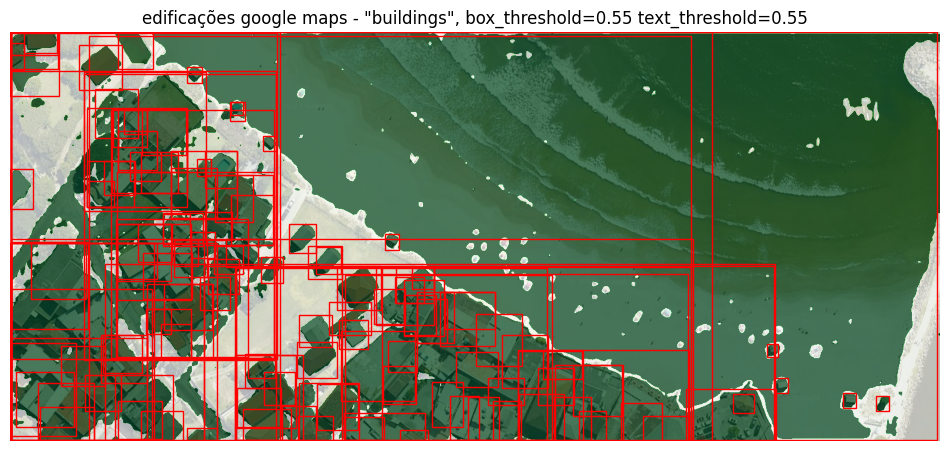

In [33]:
sam.show_anns(
    cmap='Greens',
    box_color='red',
    title='edificações google maps - "buildings", box_threshold=0.55 text_threshold=0.55',
    alpha=0.7,
    #blend=True,
)